# Régression linéaire simple :

## Etapes à suivre :

1- Récupération des données<br>
2- Visualisation des données<br>
3- Création du modèle (model(X,theta) )<br>
4- Fonction du coût (fonction_cout(X,Y,theta))<br>
5- Gradient (gradient(X,Y,theta))<br>
6- Descente du gradient (descente_gradient(X,Y,theta,alpha,n_iterations))<br>
7- Evaluer votre modèle en utilisant le coefficient de détermination<br>
8- Tracer la courbe de la fonction du coût selon les itérations<br>


## Importations des bibliothèques/modules

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1- Récupération des données

In [217]:
df = pd.read_csv("Data/reg_simple.csv")

## 2- Visualisation des données

In [218]:
df.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [219]:
df.tail()

,heure_rev,note
22,24,79
23,25,84
24,26,93
25,29,98
26,30,99


In [220]:
# on peut afficher le dataset pour avoir une vision d'ensemble
print(df)

    heure_rev  note
0           2    10
1           3    12
2           4    20
3           5    22
4           6    21
5           7    25
6           8    30
7           9    21
8          10    32
9          11    34
10         12    35
11         13    30
12         14    50
13         15    45
14         16    55
15         17    60
16         18    66
17         19    64
18         20    67
19         21    72
20         22    74
21         23    80
22         24    79
23         25    84
24         26    93
25         29    98
26         30    99


In [221]:
# Shape de notre dataset
df.shape

(27, 2)

In [222]:
# Infos de notre dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   heure_rev  27 non-null     int64
 1   note       27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [223]:
# description de notre dataset
df.describe()

,heure_rev,note
count,27.000000,27.000000
mean,15.148148,51.037037
std,8.193354,27.743997
min,2.000000,10.000000
25%,8.500000,27.500000
50%,15.000000,50.000000
75%,21.500000,73.000000
max,30.000000,99.000000


In [224]:
# On peut prendre la valeur max

MaxValue = np.max(df)
print(MaxValue)

heure_rev    30
note         99
dtype: int64


In [225]:
# On peut prendre la valeur min

MinValue = np.min(df)
print(MinValue)

heure_rev     2
note         10
dtype: int64


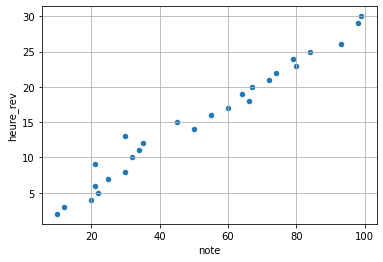

In [226]:
# exemple d'affichage
df.plot.scatter('note', 'heure_rev')
plt.grid()

On peut déduire qu'une régression linéaire convient parfaitement à notre jeu de données.

In [227]:
x=np.array(df['heure_rev'])
y=np.array(df['note'])

y=y.reshape(y.shape[0],1)
x=x.reshape(x.shape[0],1)
y.shape

(27, 1)

In [228]:
#matrice X
X=np.hstack((x,np.ones(x.shape)))
X

array([[ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [29.,  1.],
       [30.,  1.]])

## Theta

In [229]:
#initialisation de theta
theta=np.random.randn(2,1)
theta.shape

(2, 1)

In [230]:
def model(X,theta):
    return X.dot(theta)

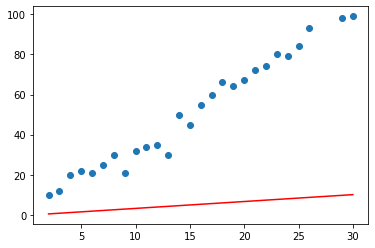

In [231]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), color='r')

## 4- Fonction du coût (fonction_cout(X,Y,theta))

In [257]:
#Fonction Cout 

def cost_fonction(X,y,Theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [233]:
cost_fonction(X,y,theta)

1359.2385952834486

In [234]:
# gradient 
def grad (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [235]:
# decente de gradient 
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
    return theta

In [236]:
# theta final
theta_final= gradient_descent(X,y,theta,learning_rate=0.001, n_iterations=1000)

In [237]:
theta_final

array([[3.3597416 ],
       [0.06211433]])

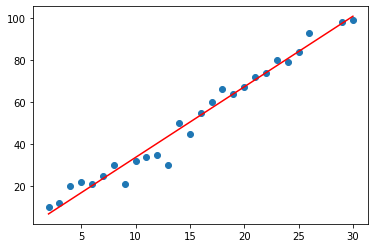

In [238]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

In [239]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 

In [240]:
coef_determination(y,predictions)

0.9732798144975192

## Autre solution :

In [242]:
df = pd.read_csv("Data/reg_simple.csv")

In [243]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [244]:
X = np.array(df.iloc[:,0])
X

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 29, 30], dtype=int64)

In [245]:
y = np.array(df.iloc[:,1])
y

array([10, 12, 20, 22, 21, 25, 30, 21, 32, 34, 35, 30, 50, 45, 55, 60, 66,
       64, 67, 72, 74, 80, 79, 84, 93, 98, 99], dtype=int64)

In [246]:
X = X.reshape(X.shape[0],1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [29],
       [30]], dtype=int64)

In [247]:
y = y.reshape(y.shape[0],1)
y

array([[10],
       [12],
       [20],
       [22],
       [21],
       [25],
       [30],
       [21],
       [32],
       [34],
       [35],
       [30],
       [50],
       [45],
       [55],
       [60],
       [66],
       [64],
       [67],
       [72],
       [74],
       [80],
       [79],
       [84],
       [93],
       [98],
       [99]], dtype=int64)

In [248]:
X_b = np.c_[np.ones((27, 1)), X]  # add x0 = 1 to each instance
linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

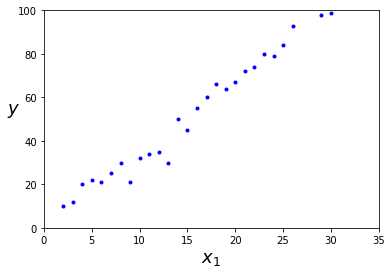

In [249]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 35, 0, 100])
plt.show()

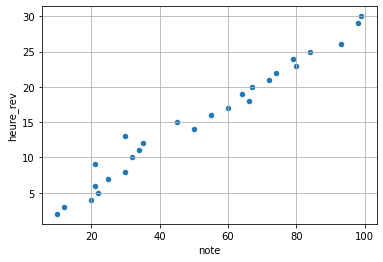

In [250]:
df.plot.scatter('note', 'heure_rev')
plt.grid()

In [251]:
X = df['note']
y = df['heure_rev']

In [252]:
X_b = np.c_[np.ones((27, 1)), X]  # add x0 = 1 to each instance
linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

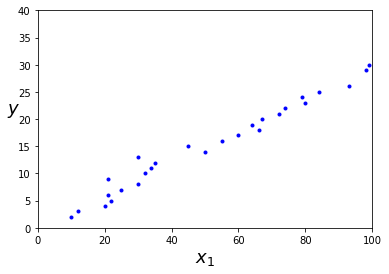

In [253]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 100, 0, 40])
plt.show()

In [254]:
linear

array([0.27831591, 0.29135375])

In [255]:
X_new = np.array([[0], [100]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(linear)
y_predict

array([ 0.27831591, 29.41369113])

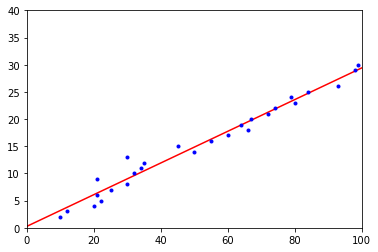

In [256]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 100, 0, 40])
plt.show()

# Régression linéaire multiple :

Implémentez un modèle de régression multiple sur la base de données issue du fichier nommé boston_house_prices.csv

## 1- Récupération des données

In [378]:
df = pd.read_csv("Data/boston_house_prices.csv")

## 2- Visualisation des données

In [379]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [380]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [381]:
df.shape

(506, 14)

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [383]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [384]:
# On peut prendre la valeur max

MaxValue = np.max(df)
print(MaxValue)

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64


In [385]:
# On peut prendre la valeur min

MinValue = np.min(df)
print(MinValue)

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64


In [386]:
x1=df[['RM']]
x2=df[['LSTAT']]
y=np.array(df[['MEDV']])

y=y.reshape(y.shape[0],1)
y.shape

(506, 1)

In [387]:
# Faisons la matrice de X
X=np.hstack((x1,x2,np.ones(x1.shape)))
X.shape

(506, 3)

## 3- Création du modèle (model(X,theta) )

In [388]:
#initialisation de theta
theta=np.random.randn(3,1)
theta

array([[-1.81459198],
       [-2.12145535],
       [ 0.70719038]])

In [389]:
def model(x,theta):
    return X.dot(theta)

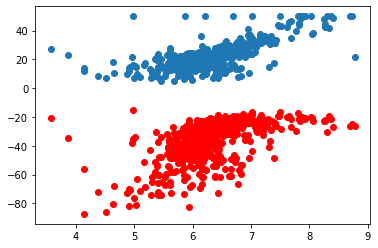

In [390]:
plt.scatter(x1,y)
plt.scatter(x1,model(X,theta), color='r')

## 4- Fonction du coût (fonction_cout(X,Y,theta))

In [391]:
#Fonction Cout 

def cost_fonction(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [392]:
cost_fonction(X,y,theta)

1855.6331265208075

## 5- Gradient (gradient(X,Y,theta))

In [393]:
def grad (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

## 6- Descente du gradient (descente_gradient(X,Y,theta,alpha,n_iterations))

In [394]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
        cost_history[i]=cost_fonction(X,y,theta)
    return theta,cost_history

## 7- Evaluer votre modèle en utilisant le coefficient de détermination

In [395]:
n_iterations= 900
learning_rate =0.0007
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)

In [396]:
theta_final

array([[ 4.67905675],
       [-0.66956482],
       [ 1.60882252]])

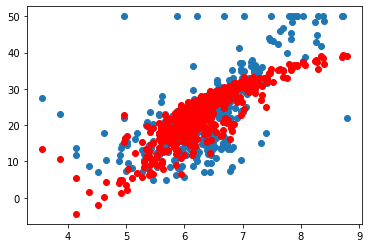

In [397]:
predictions=model(X,theta_final)
plt.scatter(x1,y)
plt.scatter(x1,predictions,c='r')

In [398]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 

In [399]:
coef_determination(y,predictions)

0.6379290745146518

## Régression Polynomiale :

**Consignes :**
    
    
En utilisant les bibliothèques adéquates de Python, implémentez un modèle de régression polynomiale sur le jeu de données issu du fichier **Position_Salaire.csv **(sans utiliser la bibliothèque Scikit-learn).


Appliquez le même modèle sur le jeu de données issu du fichier data/qualite_vin_rouge.csv


Évaluez votre modèle.
​

In [400]:
position_salarie=pd.read_csv("Data/Position_Salaries.csv")
print(position_salarie) 

            Position  Level   Salary
0   Project Analyste      1    45000
1          Ingenieur      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5         Gouverneur      6   150000
6          Associate      7   200000
7         Commercial      8   300000
8            C-level      9   500000
9                PDG     10  1000000


In [401]:
# Shape du dataframe
position_salarie.shape

(10, 3)

In [402]:
# Informations 
position_salarie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [403]:
# Description du dataframe
position_salarie.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [404]:
# On peut prendre la valeur max

MaxValue = np.max(position_salarie)
print(MaxValue)

Position    Senior Consultant
Level                      10
Salary                1000000
dtype: object


In [405]:
# On peut prendre la valeur min

MinValue = np.min(position_salarie)
print(MinValue)

Position    Associate
Level               1
Salary          45000
dtype: object


In [406]:
# On définit x et y ; on shape y
x = position_salarie[['Level']]
y = np.array(position_salarie[['Salary']])
y.shape

(10, 1)

In [407]:
# On peut faire la matrice X
X=np.hstack((x**2,x,np.ones(x.shape)))
X.shape

(10, 3)

In [408]:
# création de  theta
theta=np.random.randn(3,1)
theta

array([[ 1.19111933],
       [ 1.10802668],
       [-0.18883726]])

In [409]:
# création du modèle
def model(x,theta):
    return X.dot(theta)

In [410]:
# On peut afficher theta
print(theta)

[[ 1.19111933]
 [ 1.10802668]
 [-0.18883726]]


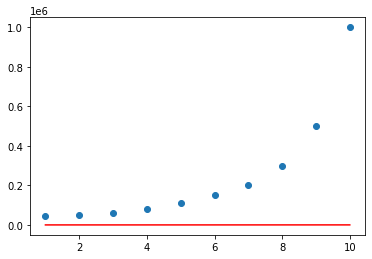

In [411]:
# Visualisation 
plt.scatter(x,y)
plt.plot(x,model(X,theta), color='r')

In [412]:
# Création de la fonction coût

def fonction_cout(X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [413]:
# Appelons la fonction_cout

fonction_cout(X,y,theta)

71432633303.66943

In [414]:
# Création du gradient

def gradient (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [415]:
# Création de la fonction descente du gradient

def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
        cost_history[i]=cost_fonction(X,y,theta)
    return theta,cost_history

In [421]:
# Reprenons theta :
n_iterations= 30                                                                                                             
learning_rate =0.0001
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)

# On affiche theta final
theta_final

array([[7025.83295846],
       [ 516.26977162],
       [  34.0756835 ]])

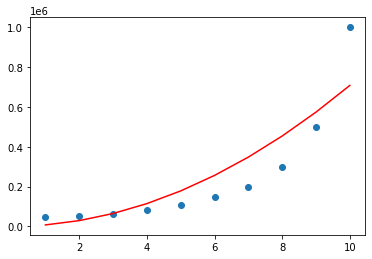

In [422]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

In [423]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 

In [424]:
coef_determination(y,predictions)

0.8074307706811783